In [1]:
import pandas as pd

train_df = pd.read_csv('Train_data (1).csv')
variable_description_df = pd.read_csv('Variable Description (1).csv')

print("First 5 rows of Train_data (1).csv:")
print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nData types and non-null values of Train_data (1).csv:")
train_df.info()

print("\nDescriptive statistics of Train_data (1).csv:")
print(train_df.describe().to_markdown(numalign="left", stralign="left"))

print("\nVariable Description (1).csv:")
print(variable_description_df.to_markdown(index=False, numalign="left", stralign="left"))

First 5 rows of Train_data (1).csv:
| Customer Id   | YearOfObservation   | Insured_Period   | Residential   | Building_Painted   | Building_Fenced   | Garden   | Settlement   | Building Dimension   | Building_Type   | Date_of_Occupancy   | NumberOfWindows   | Geo_Code   | Claim   |
|:--------------|:--------------------|:-----------------|:--------------|:-------------------|:------------------|:---------|:-------------|:---------------------|:----------------|:--------------------|:------------------|:-----------|:--------|
| H14663        | 2013                | 1                | 0             | N                  | V                 | V        | U            | 290                  | 1               | 1960                | .                 | 1053       | 0       |
| H2037         | 2015                | 1                | 0             | V                  | N                 | O        | R            | 490                  | 1               | 1850                | 4              

In [2]:
import numpy as np

# Replace '.' with np.nan in 'NumberOfWindows' column
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].replace('.', np.nan)

# Convert 'NumberOfWindows' to numeric, coercing errors
train_df['NumberOfWindows'] = pd.to_numeric(train_df['NumberOfWindows'], errors='coerce')

# Impute missing numerical values with their respective medians
for col in ['NumberOfWindows', 'Building Dimension', 'Date_of_Occupancy']:
    if train_df[col].isnull().any():
        median_val = train_df[col].median()
        train_df[col].fillna(median_val, inplace=True)

# Impute missing categorical values with their respective modes
for col in ['Garden', 'Geo_Code']:
    if train_df[col].isnull().any():
        mode_val = train_df[col].mode()[0]
        train_df[col].fillna(mode_val, inplace=True)

# Drop 'Customer Id' column
train_df.drop('Customer Id', axis=1, inplace=True)

# Verify that all missing values have been handled
print("\nMissing values after imputation:")
print(train_df.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Display the first few rows of the cleaned train_df
print("\nFirst 5 rows of cleaned Train_data (1).csv:")
print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display data types and non-null values of the cleaned train_df
print("\nData types and non-null values of cleaned Train_data (1).csv:")
train_df.info()


Missing values after imputation:
|                    | 0   |
|:-------------------|:----|
| YearOfObservation  | 0   |
| Insured_Period     | 0   |
| Residential        | 0   |
| Building_Painted   | 0   |
| Building_Fenced    | 0   |
| Garden             | 0   |
| Settlement         | 0   |
| Building Dimension | 0   |
| Building_Type      | 0   |
| Date_of_Occupancy  | 0   |
| NumberOfWindows    | 0   |
| Geo_Code           | 0   |
| Claim              | 0   |

First 5 rows of cleaned Train_data (1).csv:
| YearOfObservation   | Insured_Period   | Residential   | Building_Painted   | Building_Fenced   | Garden   | Settlement   | Building Dimension   | Building_Type   | Date_of_Occupancy   | NumberOfWindows   | Geo_Code   | Claim   |
|:--------------------|:-----------------|:--------------|:-------------------|:------------------|:---------|:-------------|:---------------------|:----------------|:--------------------|:------------------|:-----------|:--------|
| 2013                

C:\Users\Sharon\AppData\Local\Temp\ipykernel_11268\3208181428.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
C:\Users\Sharon\AppData\Local\Temp\ipykernel_11268\3208181428.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

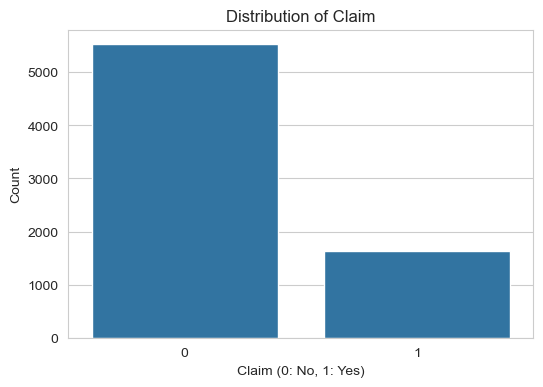

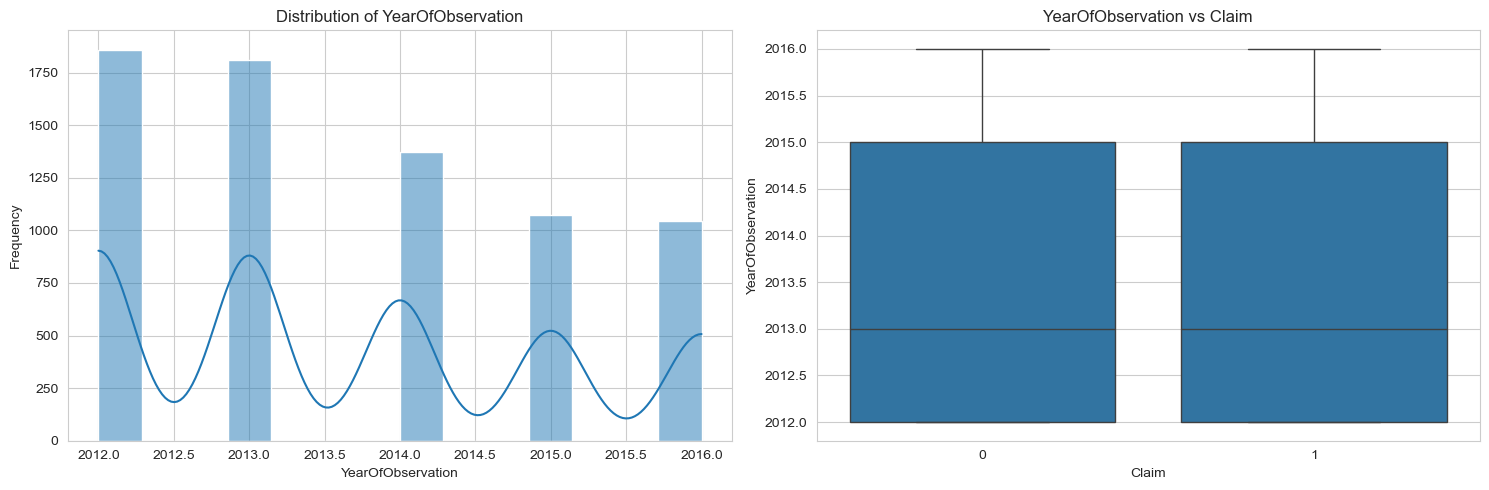

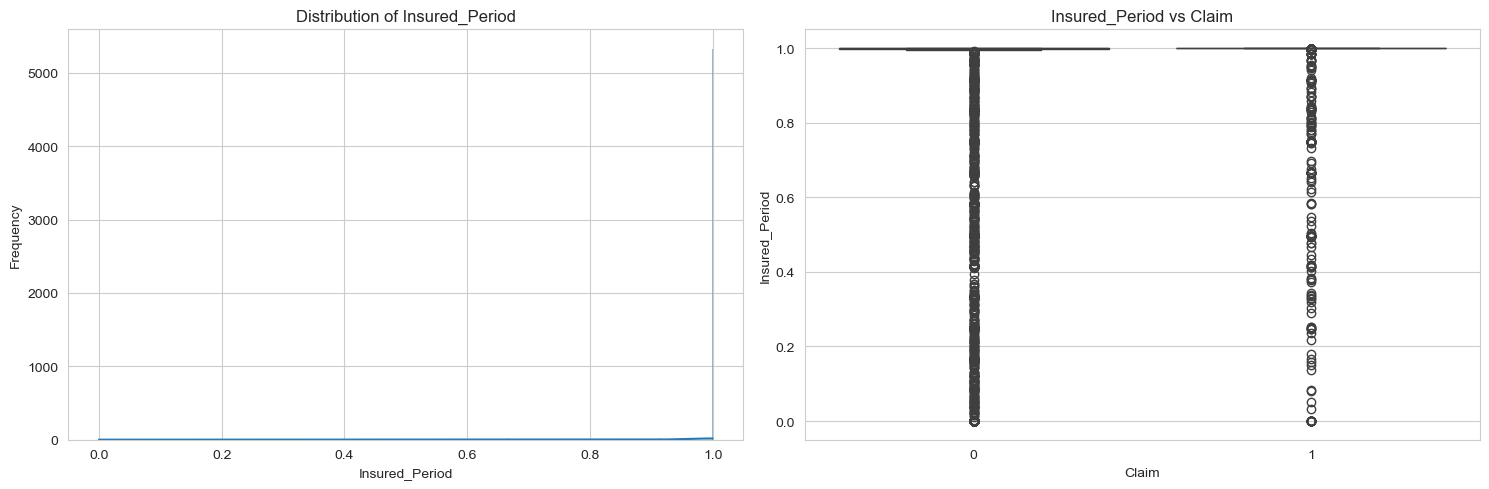

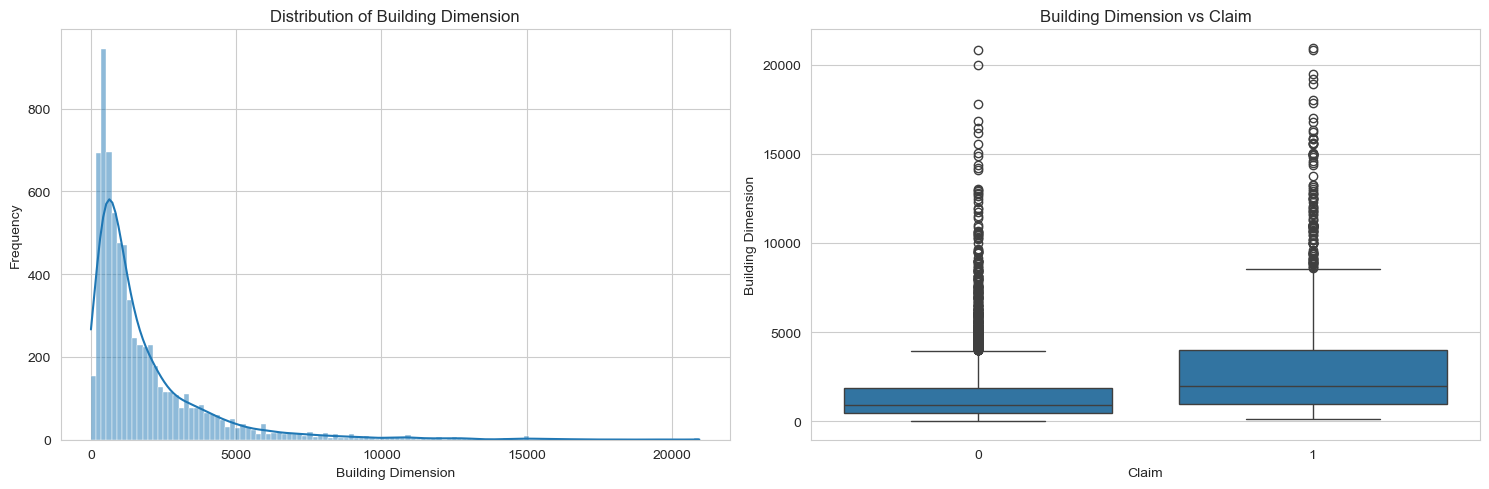

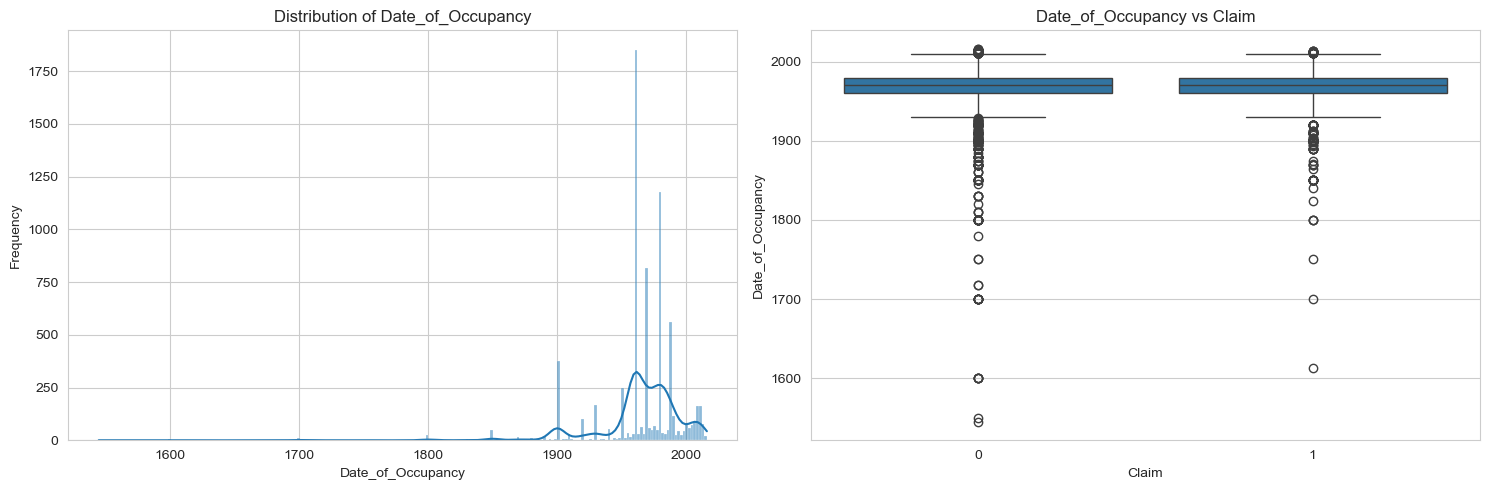

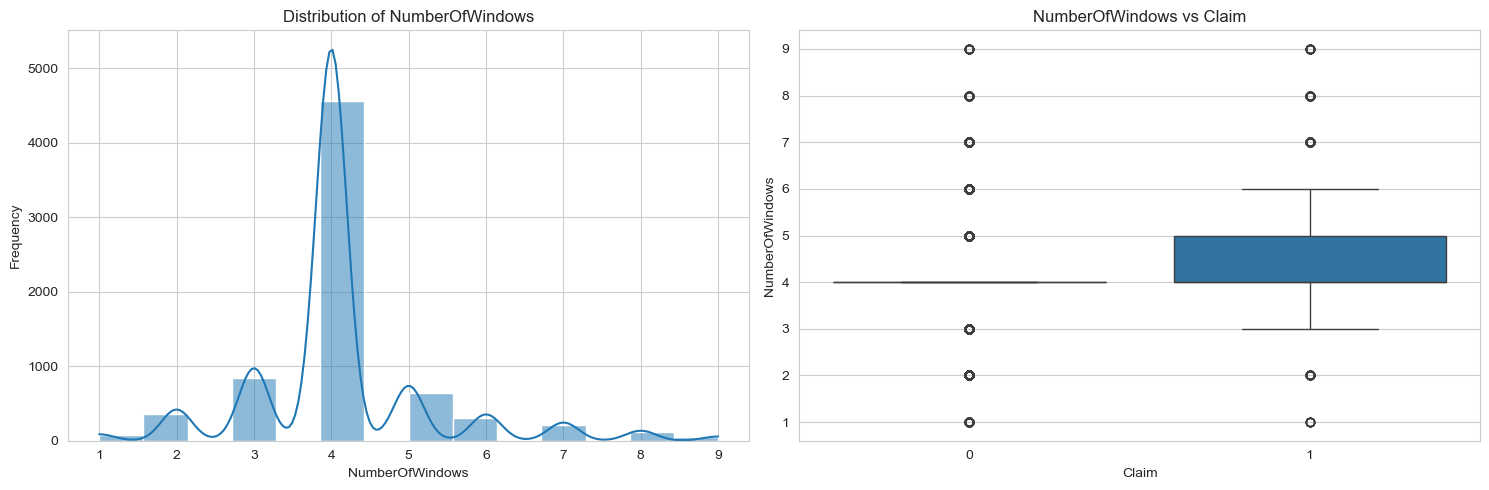

Finished plotting numerical features distributions and their relationship with the target variable.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# --- Target Variable Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Claim', data=train_df)
plt.title('Distribution of Claim')
plt.xlabel('Claim (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# --- Numerical Features Distribution and Relation to Claim ---
# Identify truly numerical columns for distribution analysis
numerical_cols = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'Date_of_Occupancy', 'NumberOfWindows']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram for distribution
    sns.histplot(train_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box plot to show relationship with 'Claim'
    sns.boxplot(x='Claim', y=col, data=train_df, ax=axes[1])
    axes[1].set_title(f'{col} vs Claim')
    axes[1].set_xlabel('Claim')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

print("Finished plotting numerical features distributions and their relationship with the target variable.")

Visualizing categorical features distributions and their relationship with the target variable:


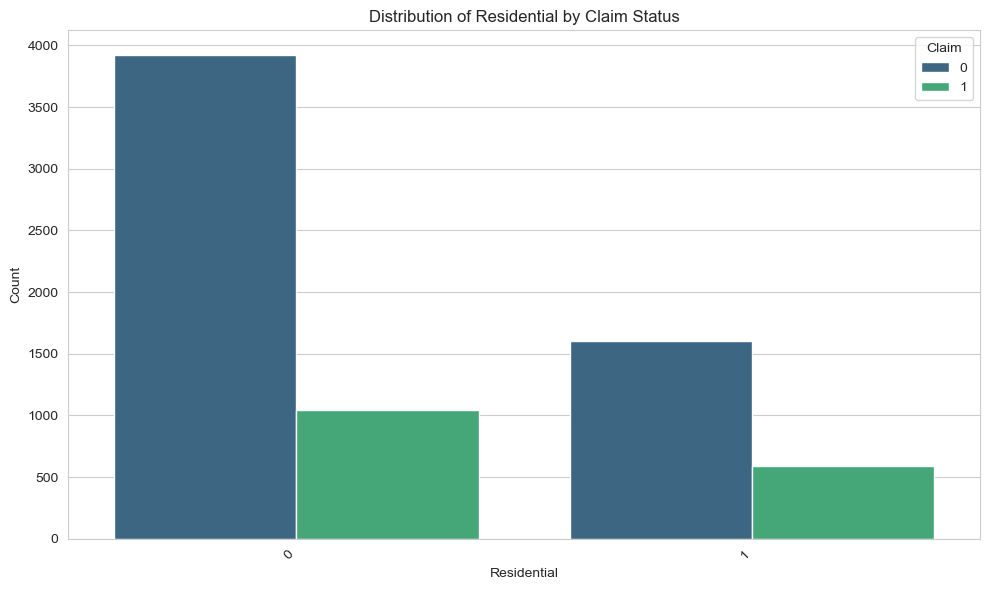

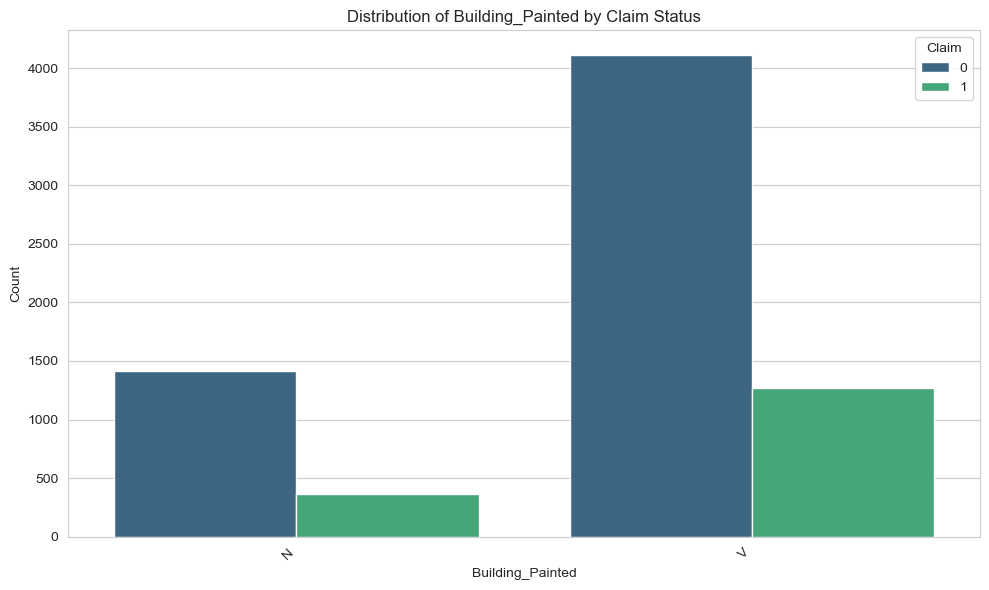

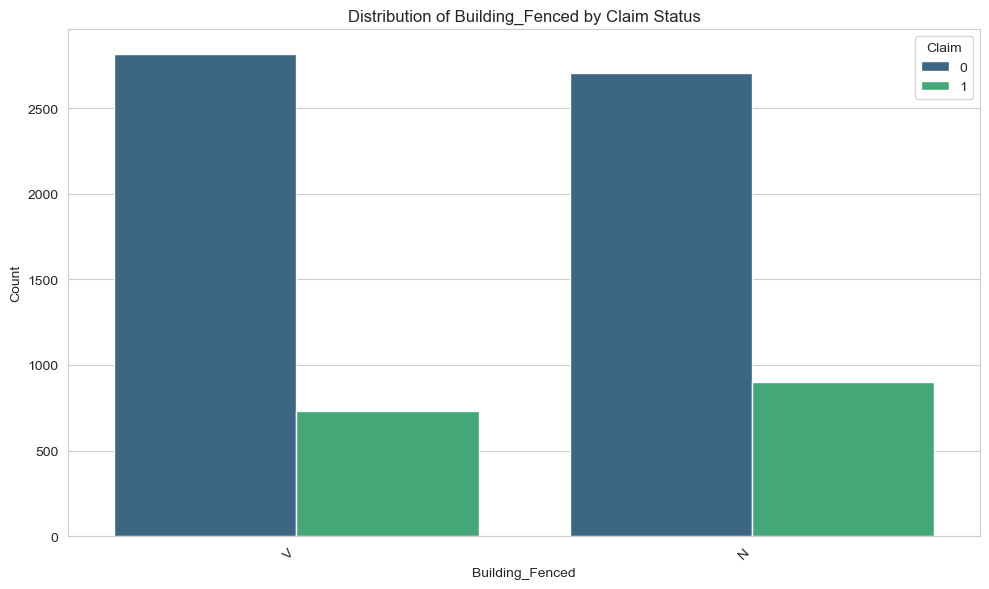

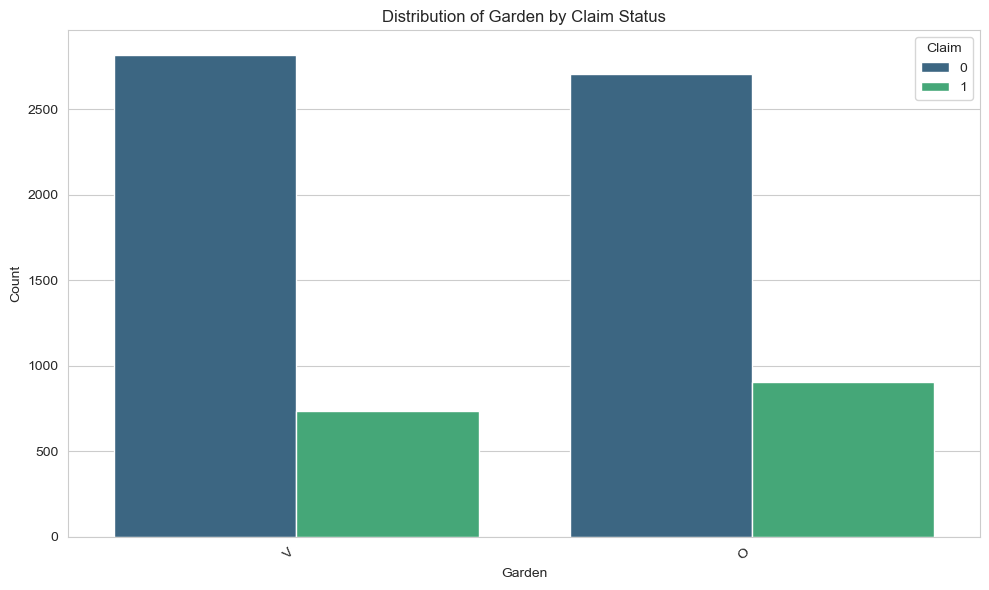

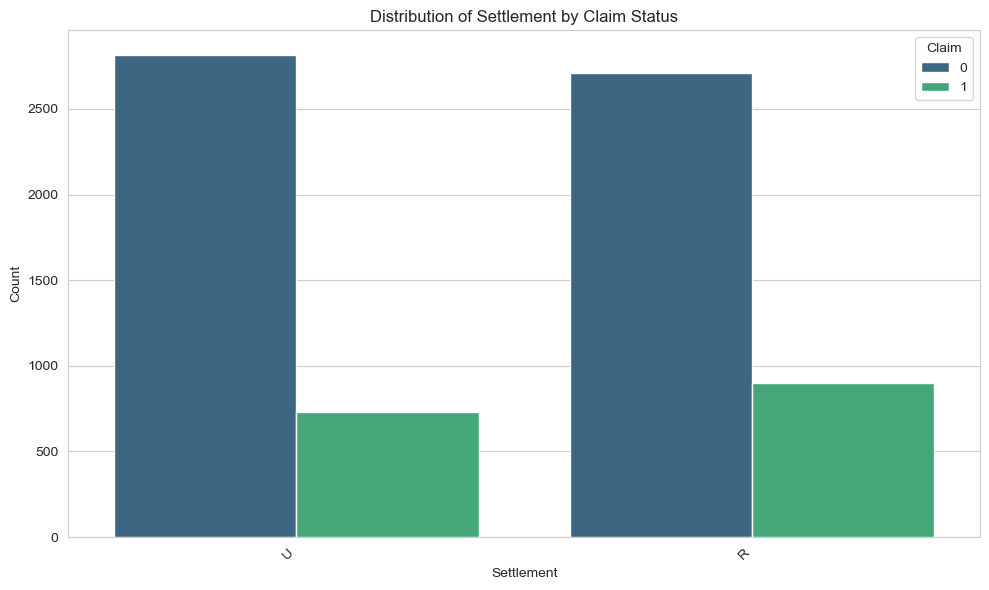

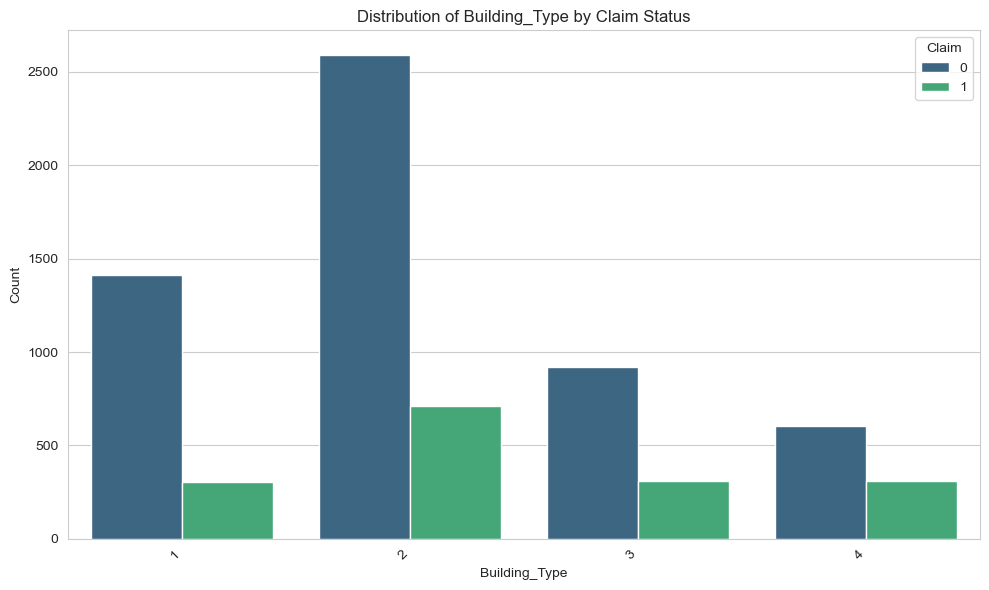

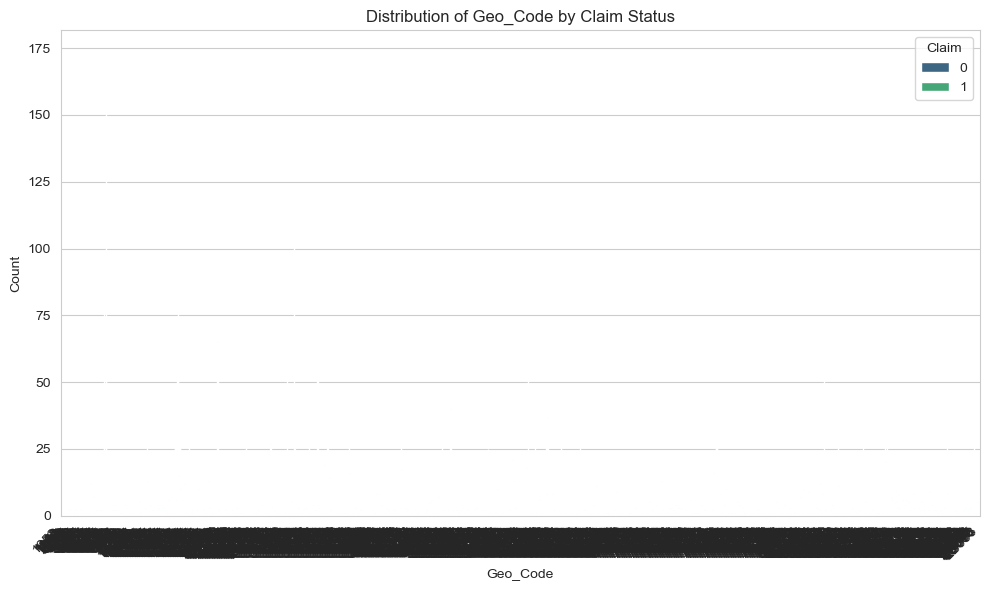

Finished plotting categorical features distributions and their relationship with the target variable.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'Geo_Code']

print("Visualizing categorical features distributions and their relationship with the target variable:")

for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Count plot for distribution of categorical feature
    sns.countplot(x=col, data=train_df, hue='Claim', palette='viridis')
    plt.title(f'Distribution of {col} by Claim Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many categories
    plt.legend(title='Claim')
    plt.tight_layout()
    plt.show()

print("Finished plotting categorical features distributions and their relationship with the target variable.")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate the target variable 'Claim' from the features
X = train_df.drop('Claim', axis=1)
y = train_df['Claim']

# 2. Identify numerical and categorical columns from X
# Exclude 'Claim' which was already separated
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 3. Apply one-hot encoding to the identified categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 4. Standardize the numerical features
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# 5. Concatenate the scaled numerical features with the one-hot encoded categorical features (already done in X_encoded)
# 6. Split the preprocessed feature set (X) and the target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of preprocessed X_train:")
print(X_train.head().to_markdown(index=False, numalign="left", stralign="left"))

Shape of X_train: (5728, 1317)
Shape of X_test: (1432, 1317)
Shape of y_train: (5728,)
Shape of y_test: (1432,)

First 5 rows of preprocessed X_train:
| YearOfObservation   | Insured_Period   | Residential   | Building Dimension   | Building_Type   | Date_of_Occupancy   | NumberOfWindows   | Building_Painted_V   | Building_Fenced_V   | Garden_V   | Settlement_U   | Geo_Code_10081   | Geo_Code_10297   | Geo_Code_10333   | Geo_Code_10343   | Geo_Code_10362   | Geo_Code_10387   | Geo_Code_1053   | Geo_Code_11069   | Geo_Code_11076   | Geo_Code_11170   | Geo_Code_11202   | Geo_Code_11262   | Geo_Code_11266   | Geo_Code_1143   | Geo_Code_11441   | Geo_Code_1160   | Geo_Code_1173   | Geo_Code_11910   | Geo_Code_12084   | Geo_Code_12096   | Geo_Code_12145   | Geo_Code_12174   | Geo_Code_12176   | Geo_Code_12202   | Geo_Code_12208   | Geo_Code_1224   | Geo_Code_12300   | Geo_Code_1283   | Geo_Code_13001   | Geo_Code_13002   | Geo_Code_13004   | Geo_Code_13005   | Geo_Code_13007   | Geo_Code_13

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Instantiate Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train Logistic Regression model
print("Training Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Train Random Forest Classifier model
print("Training Random Forest Classifier model...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

print("Models have been trained and stored.")

Training Logistic Regression model...
Logistic Regression model trained.
Training Random Forest Classifier model...
Random Forest Classifier model trained.
Models have been trained and stored.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Evaluate Logistic Regression Model ---
print("\n--- Logistic Regression Model Evaluation ---")
# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
# Get probability scores for ROC AUC
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

# Print metrics
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")
print(f"ROC AUC: {roc_auc_log_reg:.4f}")

# --- Evaluate Random Forest Classifier Model ---
print("\n--- Random Forest Classifier Model Evaluation ---")
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
# Get probability scores for ROC AUC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

# Print metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# --- Comparison ---
print("\n--- Model Comparison ---")
if roc_auc_rf > roc_auc_log_reg:
    print("Random Forest Classifier appears to perform better based on ROC AUC score.")
elif roc_auc_log_reg > roc_auc_rf:
    print("Logistic Regression appears to perform better based on ROC AUC score.")
else:
    print("Both models perform similarly based on ROC AUC score.")


--- Logistic Regression Model Evaluation ---
Accuracy: 0.7807
Precision: 0.6042
Recall: 0.1737
F1-Score: 0.2698
ROC AUC: 0.6865

--- Random Forest Classifier Model Evaluation ---
Accuracy: 0.7689
Precision: 0.5106
Recall: 0.2156
F1-Score: 0.3032
ROC AUC: 0.6739

--- Model Comparison ---
Logistic Regression appears to perform better based on ROC AUC score.


Data Analysis Key Findings
Initial Data Assessment: The dataset initially contained 7160 entries and 14 columns, with a target variable 'Claim' showing approximately 22.8% claims. Significant missing values were identified in 'Garden' (7), 'Building Dimension' (106), 'Date_of_Occupancy' (508), and 'Geo_Code' (102). The 'NumberOfWindows' column contained non-numeric characters ('.') and was incorrectly typed as 'object'.
Data Cleaning and Preprocessing:
The '.' values in 'NumberOfWindows' were replaced with missing values, and the column was converted to a numeric type.
Missing numerical values ('NumberOfWindows', 'Building Dimension', 'Date_of_Occupancy') were imputed using their respective medians.
Missing categorical values ('Garden', 'Geo_Code') were imputed using their respective modes.
The 'Customer Id' column was dropped as it was not relevant for modeling.
All missing values were successfully addressed, and data types were corrected.
Feature Engineering: Categorical features were one-hot encoded (using drop_first=True), and numerical features were standardized using StandardScaler. The dataset was split into an 80% training set (5728 samples) and a 20% testing set (1432 samples). The final feature set after encoding contained 1317 features.
Model Performance (Logistic Regression):
Accuracy: 0.7807
Precision: 0.6042
Recall: 0.1737
F1-Score: 0.2698
ROC AUC: 0.6865
Model Performance (Random Forest Classifier):
Accuracy: 0.7689
Precision: 0.5106
Recall: 0.2156
F1-Score: 0.3032
ROC AUC: 0.6739
Model Comparison: Logistic Regression showed a slightly better overall discriminative power with an ROC AUC of 0.6865 compared to Random Forest's 0.6739. While Random Forest had a marginally higher recall and F1-score, Logistic Regression achieved higher accuracy and precision.
Insights or Next Steps
The modest ROC AUC scores for both models (around 0.68) suggest that predicting insurance claims accurately is challenging with the current features, indicating potential for further feature engineering or exploring more complex models.
Given the imbalance in the 'Claim' target variable (approximately 22.8% claims), focusing on metrics like ROC AUC, Precision, Recall, and F1-score is more appropriate than just accuracy. Further steps could include addressing class imbalance directly (e.g., SMOTE, undersampling) to potentially improve model performance, especially recall for claim prediction. 